In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 경고 메시지가 뜨지 않게 설정
import warnings 
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 검정
from scipy import stats

# 인코딩
from sklearn.preprocessing import LabelEncoder

In [2]:
check = pd.read_parquet('2018_신용정보.parquet')

In [3]:
target = pd.read_parquet('2018_회원정보.parquet', columns = ['기준년월', 'Segment'])

In [4]:
target = target.loc[(target['기준년월'] == 201812) & (target['Segment'].notna()), 'Segment']

In [5]:
target = target.reset_index(drop = True)

In [6]:
df = pd.read_csv('병합_selected_features.csv')

In [7]:
# df[list(check.columns)]

In [8]:
drop_list = ['기준년월', '최초한도금액', 'CA한도금액', 'CL이자율_할인전', 'RV현금서비스이자율_할인전', 'RV신청일자', 'RV약정청구율', 'RV최소결제비율',
             '자발한도감액횟수_R12M', '자발한도감액후경과월', '상향가능한도금액', '상향가능CA한도금액', '카드론동의여부', '월상환론상향가능한도금액',
             'RV전환가능여부', '일시불ONLY전환가능여부', '특별한도보유여부_R3M', '연체감액여부_R3M', '한도심사요청건수', '한도요청거절건수',
             '한도심사요청후경과월', '한도심사거절후경과월', '시장단기연체여부_R6M', '시장단기연체여부_R3M', '시장연체상환여부_R6M',
             '시장연체상환여부_R3M']

In [9]:
df = df[list(check.drop(drop_list, axis = 1).columns)]

In [10]:
df

,ID,카드이용한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,RV일시불이자율_할인전,자발한도감액금액_R12M,강제한도감액횟수_R12M,강제한도감액금액_R12M,강제한도감액후경과월,한도증액횟수_R12M,한도증액금액_R12M,한도증액후경과월,카드이용한도금액_B1M,카드이용한도금액_B2M,rv최초시작후경과일
0,TRAIN_000000,19507,0,0,22.996676,18.407148,0,0,0,12,0,0,12,20665,20690,99999999
1,TRAIN_000001,9997,42330,92751,14.817007,11.042575,0,0,0,12,0,0,12,10001,10000,325
2,TRAIN_000002,86975,0,0,22.265409,17.426129,0,1,1,12,0,0,12,76596,77033,2438
3,TRAIN_000003,18679,0,0,22.999567,19.641827,0,0,0,12,0,0,12,20413,20979,99999999
4,TRAIN_000004,178248,48003,155318,14.762421,10.465141,0,0,0,12,0,0,12,174634,176300,99999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TRAIN_399995,20070,0,54445,15.243670,10.545876,0,0,0,12,0,0,12,21097,21152,99999999
399996,TRAIN_399996,84217,0,156800,14.843464,11.102726,0,0,0,12,1,1,8,78997,78140,99999999
399997,TRAIN_399997,52612,0,0,17.038599,13.278475,0,0,0,12,0,0,12,61315,63374,99999999
399998,TRAIN_399998,10002,90004,180906,15.182880,10.594124,0,1,0,12,0,0,12,10002,10001,99999999


In [11]:
df = pd.concat([df, target], axis = 1)

In [12]:
df

,ID,카드이용한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,RV일시불이자율_할인전,자발한도감액금액_R12M,강제한도감액횟수_R12M,강제한도감액금액_R12M,강제한도감액후경과월,한도증액횟수_R12M,한도증액금액_R12M,한도증액후경과월,카드이용한도금액_B1M,카드이용한도금액_B2M,rv최초시작후경과일,Segment
0,TRAIN_000000,19507,0,0,22.996676,18.407148,0,0,0,12,0,0,12,20665,20690,99999999,D
1,TRAIN_000001,9997,42330,92751,14.817007,11.042575,0,0,0,12,0,0,12,10001,10000,325,E
2,TRAIN_000002,86975,0,0,22.265409,17.426129,0,1,1,12,0,0,12,76596,77033,2438,C
3,TRAIN_000003,18679,0,0,22.999567,19.641827,0,0,0,12,0,0,12,20413,20979,99999999,D
4,TRAIN_000004,178248,48003,155318,14.762421,10.465141,0,0,0,12,0,0,12,174634,176300,99999999,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TRAIN_399995,20070,0,54445,15.243670,10.545876,0,0,0,12,0,0,12,21097,21152,99999999,E
399996,TRAIN_399996,84217,0,156800,14.843464,11.102726,0,0,0,12,1,1,8,78997,78140,99999999,D
399997,TRAIN_399997,52612,0,0,17.038599,13.278475,0,0,0,12,0,0,12,61315,63374,99999999,C
399998,TRAIN_399998,10002,90004,180906,15.182880,10.594124,0,1,0,12,0,0,12,10002,10001,99999999,E


In [13]:
# Segment 인코딩
le = LabelEncoder()
target_ec = le.fit_transform(df['Segment'])

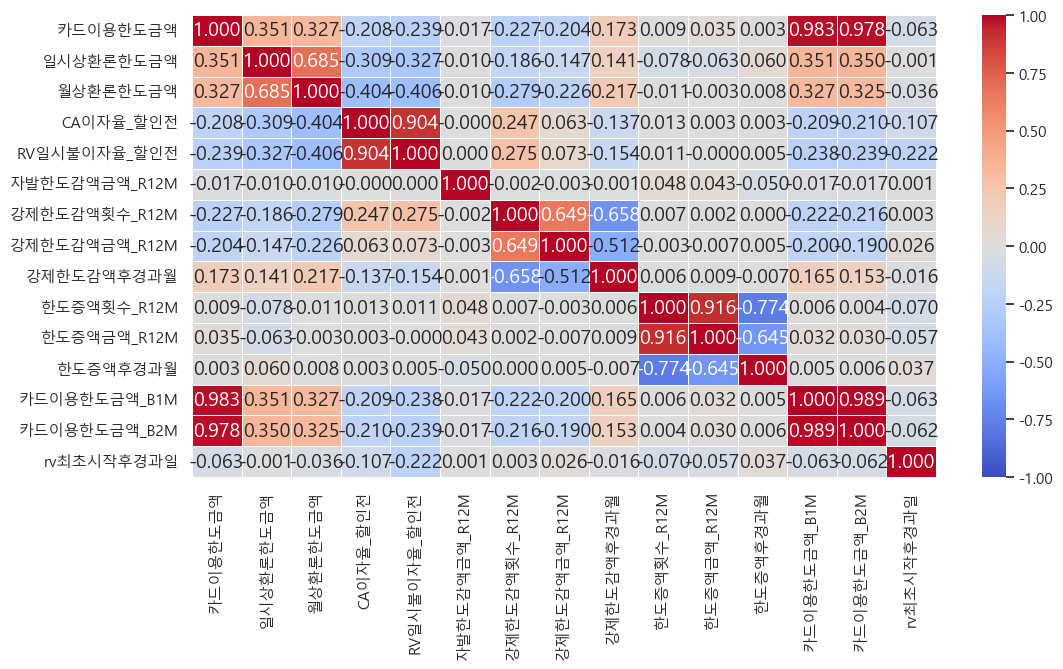

In [87]:
sns.heatmap(card_df.corr(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5, vmin = -1, vmax = 1)
plt.show()

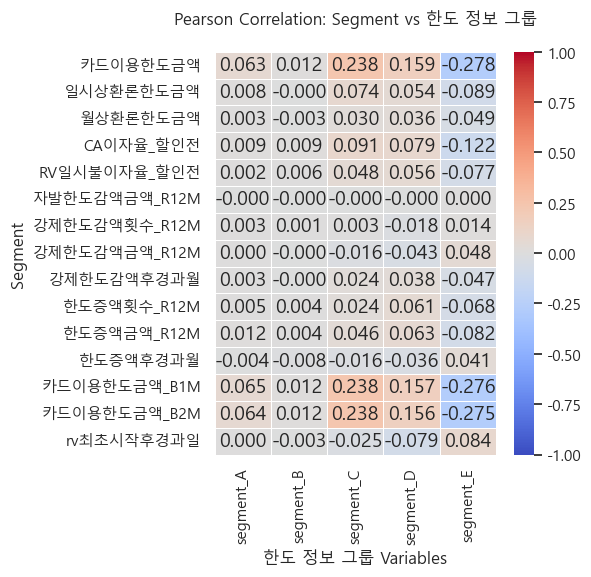

In [85]:
# Segment
target = df['Segment']

# segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(target, prefix='segment')

card_df = df.drop(['ID', 'Segment'], axis = 1)

corr_df = pd.concat([card_df, segment_dummies], axis = 1)

# 전체 상관계수 구하기 (피어슨 방식이 기본)
corr_matrix = corr_df.corr()

# segment_dummies 행 vs numeric_cols 열만 추출
segment_corr = corr_matrix.loc[segment_dummies.columns, card_df.columns]

# 히트맵 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(segment_corr.T, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5, vmin = -1, vmax = 1)
plt.title('Pearson Correlation: Segment vs 한도 정보 그룹', pad = 20)
plt.xlabel('한도 정보 그룹 Variables')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

### Segment 분류에 유의미한 변수 찾기

#### 카드이용한도금액

In [14]:
df['카드이용한도금액'].value_counts()

카드이용한도금액
0         20521
9999       6009
10000      5979
10001      5337
9998       4920
          ...  
200043        1
181465        1
195800        1
83647         1
5219          1
Name: count, Length: 52493, dtype: int64

In [64]:
AB_df = df.loc[df['Segment'].isin(['A', 'B'])]
CD_df = df.loc[df['Segment'].isin(['C', 'D'])]
E_df = df.loc[df['Segment'] == 'E']

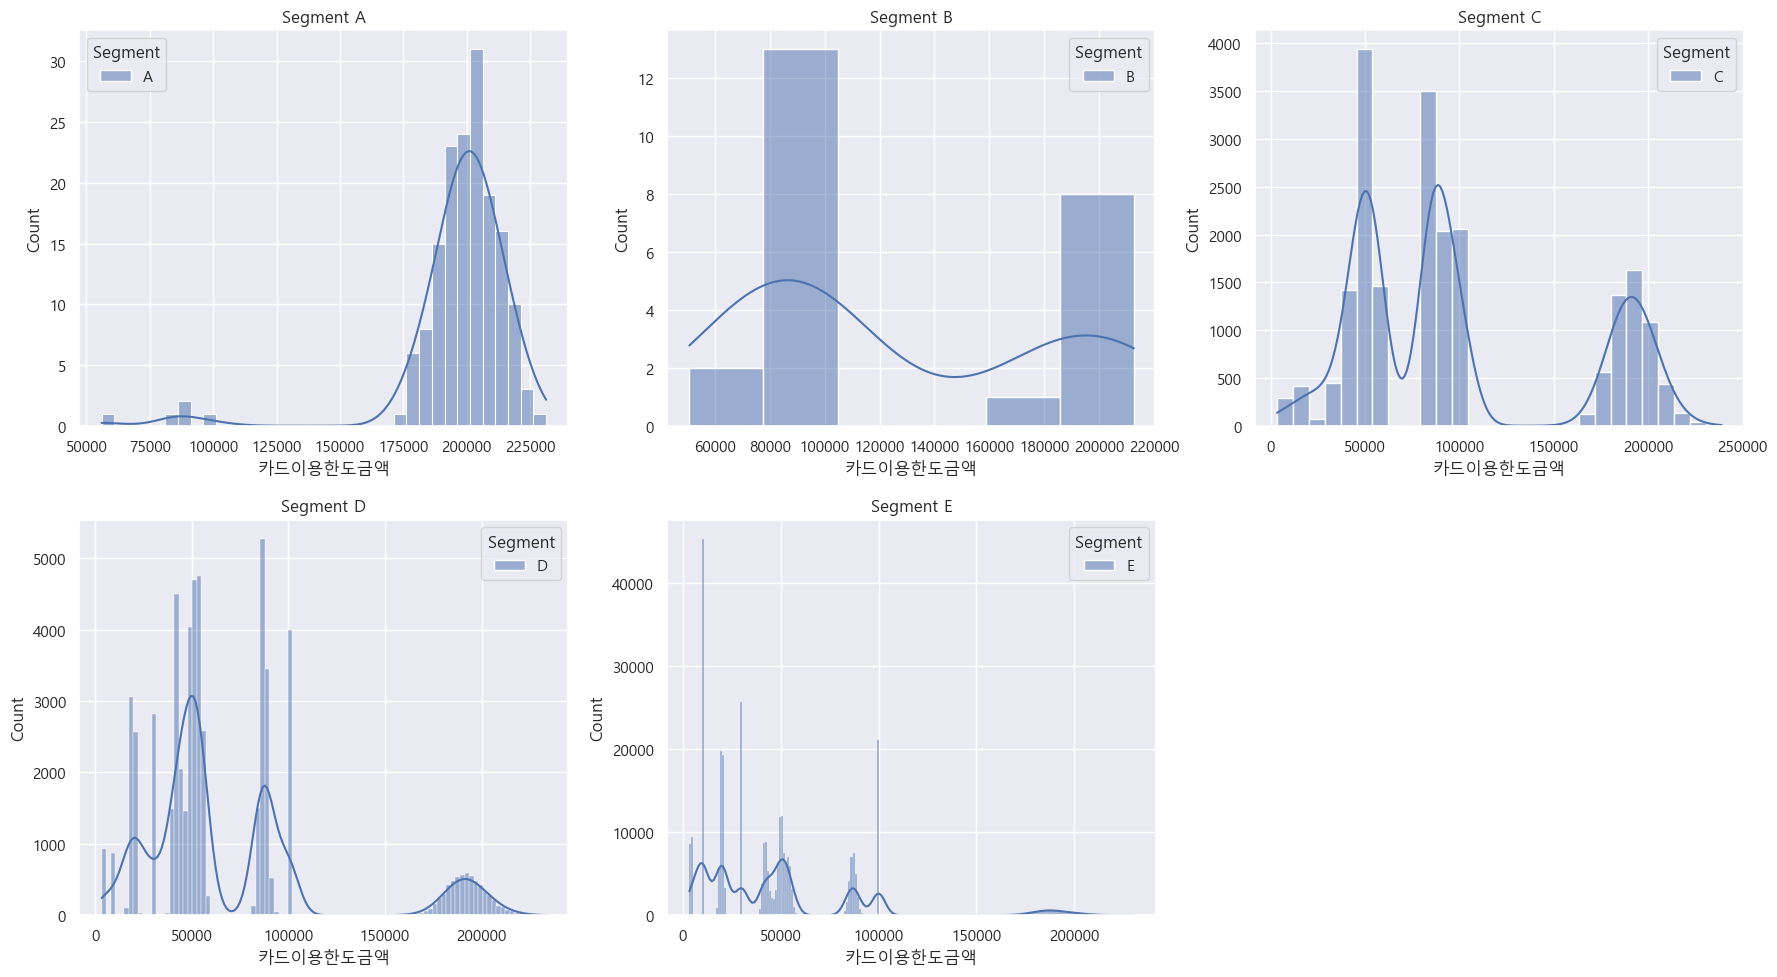

In [20]:
# 세그먼트별 데이터프레임 리스트와 레이블
dfs = [A_df.loc[A_df['카드이용한도금액'] != 0],
       B_df.loc[B_df['카드이용한도금액'] != 0],
       C_df.loc[C_df['카드이용한도금액'] != 0],
       D_df.loc[D_df['카드이용한도금액'] != 0],
       E_df.loc[E_df['카드이용한도금액'] != 0]]
segments = ['A', 'B', 'C', 'D', 'E']

# 서브플롯 생성 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # 2차원을 1차원으로 변환해서 인덱싱 편하게

# 각 세그먼트별 subplot에 그래프 그리기
for i, (df_seg, seg_label) in enumerate(zip(dfs, segments)):
    sns.histplot(
        data=df_seg,
        x='카드이용한도금액',
        kde=True,
        hue='Segment',
        ax=axes[i]
    )
    axes[i].set_title(f'Segment {seg_label}')
    axes[i].set_xlabel('카드이용한도금액')
    axes[i].set_ylabel('Count')

# 빈 subplot 제거 (2행 3열이지만 데이터는 5개)
if len(dfs) < len(axes):
    for j in range(len(dfs), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- A는 대부분 높은 이용한도 금액에 분포되어 있는 것을 볼 수 있다.
- 다른 분포의 경우 여러 금액대에 분포가 생기지만 대체로 낮은 쪽에 분포되어 있다.

#### 일시상환론한도금액

In [70]:
df.loc[df['Segment'] == 'B', '일시상환론한도금액'].value_counts()

일시상환론한도금액
0         18
200000     2
48012      1
48000      1
199992     1
90001      1
Name: count, dtype: int64

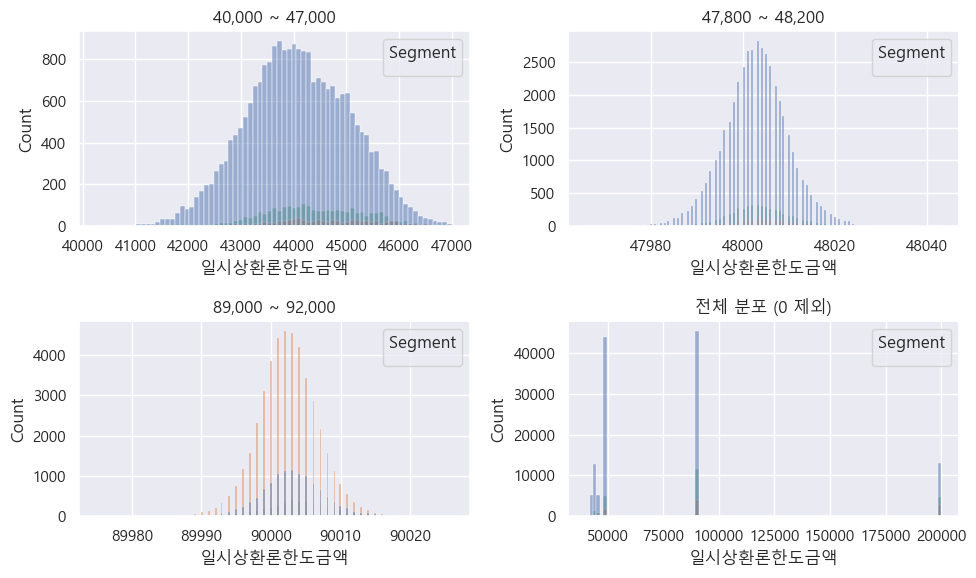

In [75]:
# 1. 데이터 구간별 필터링
a1 = df.loc[(df['일시상환론한도금액'] >= 40000) & (df['일시상환론한도금액'] <= 47000)]
a2 = df.loc[(df['일시상환론한도금액'] >= 47800) & (df['일시상환론한도금액'] <= 48200)]
a3 = df.loc[(df['일시상환론한도금액'] >= 89000) & (df['일시상환론한도금액'] <= 92000)]
a4 = df.loc[df['일시상환론한도금액'] != 0]

# 2. Subplot 구성
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  #

# 3. 각 구간에 대해 히스토그램 그리기
sns.histplot(data=a1, x='일시상환론한도금액', hue='Segment', ax=axes[0, 0])
axes[0, 0].set_title('40,000 ~ 47,000')

sns.histplot(data=a2, x='일시상환론한도금액', hue='Segment', ax=axes[0, 1])
axes[0, 1].set_title('47,800 ~ 48,200')

sns.histplot(data=a3, x='일시상환론한도금액', hue='Segment', ax=axes[1, 0])
axes[1, 0].set_title('89,000 ~ 92,000')

sns.histplot(data=a4, x='일시상환론한도금액', hue='Segment', ax=axes[1, 1])
axes[1, 1].set_title('전체 분포 (0 제외)')

# 4. 공통 설정
for ax in axes.flat:
    ax.set_xlabel('일시상환론한도금액')
    ax.set_ylabel('Count')
    ax.legend(title='Segment')

plt.tight_layout()
plt.show()


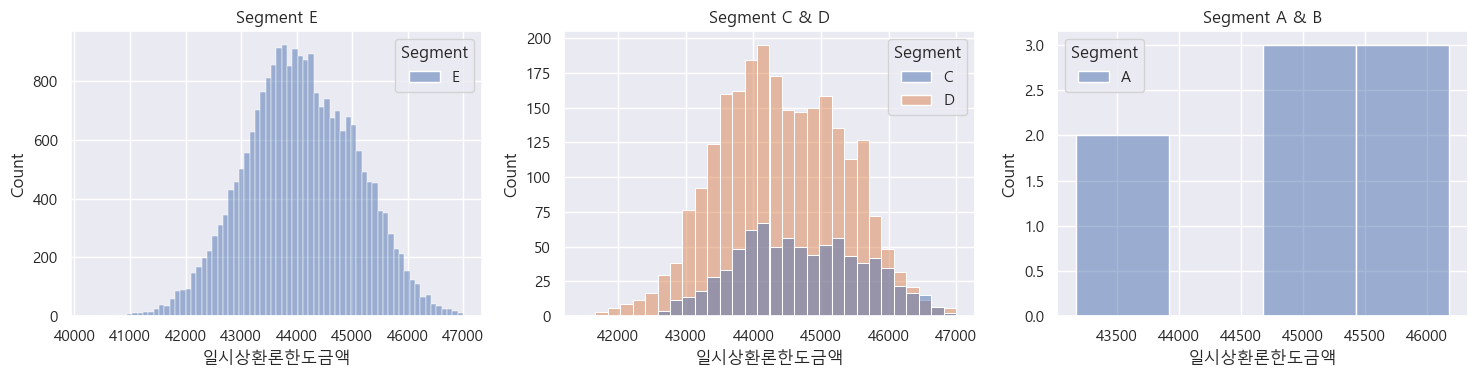

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
# sns.set(style='whitegrid')
# plt.rcParams['axes.axisbelow'] = True

# 데이터 필터링
e1 = E_df.loc[(E_df['일시상환론한도금액'] >= 40000) & (E_df['일시상환론한도금액'] <= 47000)]
cd1 = CD_df.loc[(CD_df['일시상환론한도금액'] >= 40000) & (CD_df['일시상환론한도금액'] <= 47000)]
ab1 = AB_df.loc[(AB_df['일시상환론한도금액'] >= 40000) & (AB_df['일시상환론한도금액'] <= 47000)]

# Subplot 구성
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

# 각각의 subplot에 histplot 그리기
sns.histplot(data=e1, x='일시상환론한도금액', hue='Segment', ax=axes[0])
axes[0].set_title('Segment E')

sns.histplot(data=cd1, x='일시상환론한도금액', hue='Segment', ax=axes[1])
axes[1].set_title('Segment C & D')

sns.histplot(data=ab1, x='일시상환론한도금액', hue='Segment', ax=axes[2])
axes[2].set_title('Segment A & B')

# 공통 설정
for ax in axes:
    ax.set_xlabel('일시상환론한도금액')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

- A & B의 경우 거의 없음 -> 낮은 한도에는 분포되지 않는다.

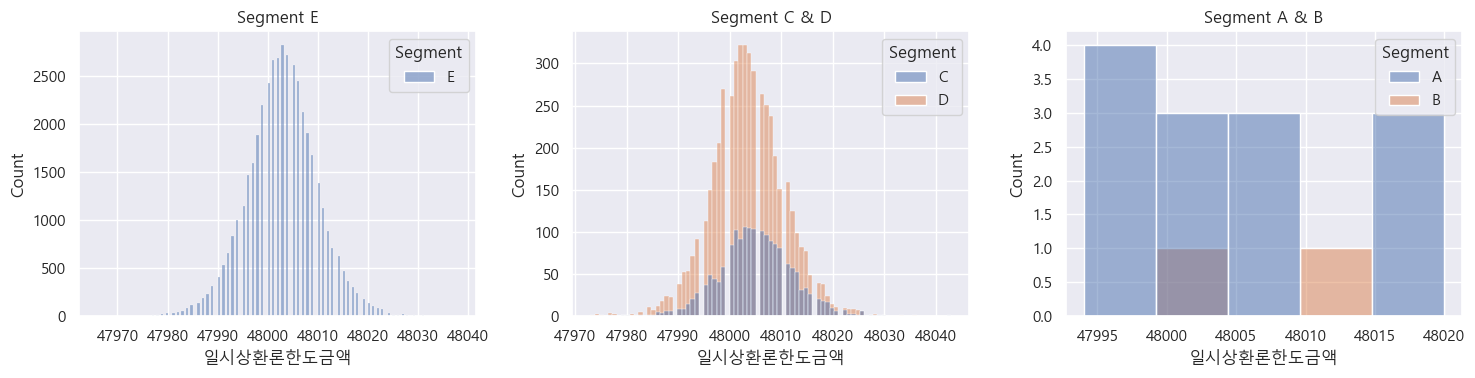

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
# sns.set(style='whitegrid')
# plt.rcParams['axes.axisbelow'] = True

# 데이터 필터링
e1 = E_df.loc[(E_df['일시상환론한도금액'] >= 47800) & (E_df['일시상환론한도금액'] <= 48200)]
cd1 = CD_df.loc[(CD_df['일시상환론한도금액'] >= 47800) & (CD_df['일시상환론한도금액'] <= 48200)]
ab1 = AB_df.loc[(AB_df['일시상환론한도금액'] >= 47800) & (AB_df['일시상환론한도금액'] <= 48200)]

# Subplot 구성
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

# 각각의 subplot에 histplot 그리기
sns.histplot(data=e1, x='일시상환론한도금액', hue='Segment', ax=axes[0])
axes[0].set_title('Segment E')

sns.histplot(data=cd1, x='일시상환론한도금액', hue='Segment', ax=axes[1])
axes[1].set_title('Segment C & D')

sns.histplot(data=ab1, x='일시상환론한도금액', hue='Segment', ax=axes[2])
axes[2].set_title('Segment A & B')

# 공통 설정
for ax in axes:
    ax.set_xlabel('일시상환론한도금액')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


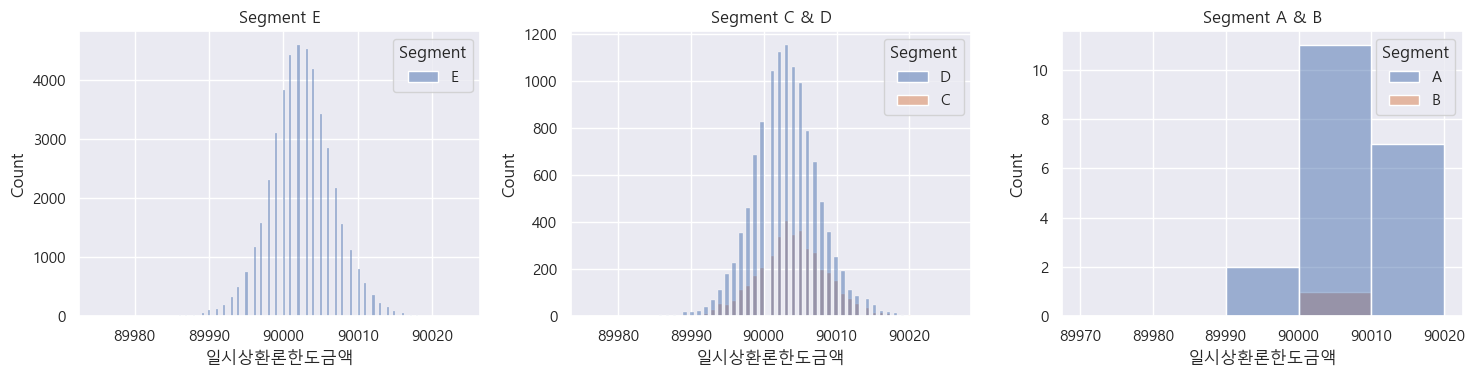

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
# sns.set(style='whitegrid')
# plt.rcParams['axes.axisbelow'] = True

# 데이터 필터링
e1 = E_df.loc[(E_df['일시상환론한도금액'] >= 89000) & (E_df['일시상환론한도금액'] <= 92000)]
cd1 = CD_df.loc[(CD_df['일시상환론한도금액'] >= 89000) & (CD_df['일시상환론한도금액'] <= 92000)]
ab1 = AB_df.loc[(AB_df['일시상환론한도금액'] >= 89000) & (AB_df['일시상환론한도금액'] <= 92000)]

# Subplot 구성
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

# 각각의 subplot에 histplot 그리기
sns.histplot(data=e1, x='일시상환론한도금액', hue='Segment', ax=axes[0])
axes[0].set_title('Segment E')

sns.histplot(data=cd1, x='일시상환론한도금액', hue='Segment', ax=axes[1])
axes[1].set_title('Segment C & D')

sns.histplot(data=ab1, x='일시상환론한도금액', hue='Segment', bins = [89970, 89980, 89990, 90000, 90010, 90020], ax=axes[2])
axes[2].set_title('Segment A & B')

# 공통 설정
for ax in axes:
    ax.set_xlabel('일시상환론한도금액')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

#### 카드이용한도금액_B1M

In [24]:
df['카드이용한도금액_B1M']

0          20665
1          10001
2          76596
3          20413
4         174634
           ...  
399995     21097
399996     78997
399997     61315
399998     10002
399999     70247
Name: 카드이용한도금액_B1M, Length: 400000, dtype: int64

In [30]:
card_df.corr()

,카드이용한도금액,카드이용한도금액_B1M,카드이용한도금액_B2M
카드이용한도금액,1.000000,0.983252,0.977768
카드이용한도금액_B1M,0.983252,1.000000,0.988965
카드이용한도금액_B2M,0.977768,0.988965,1.000000


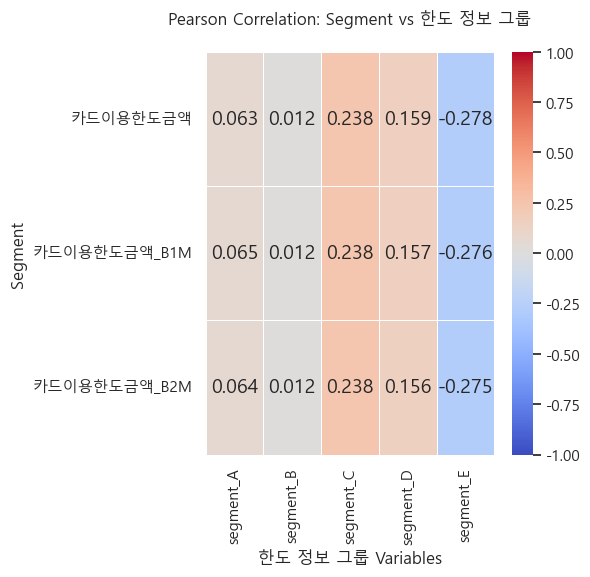

In [32]:
# Segment
target = df['Segment']

# segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(target, prefix='segment')

card_df = pd.DataFrame({
    '카드이용한도금액' : df['카드이용한도금액'],
    '카드이용한도금액_B1M' : df['카드이용한도금액_B1M'],
    '카드이용한도금액_B2M' : df['카드이용한도금액_B2M']
})

corr_df = pd.concat([card_df, segment_dummies], axis = 1)

# 전체 상관계수 구하기 (피어슨 방식이 기본)
corr_matrix = corr_df.corr()

# segment_dummies 행 vs numeric_cols 열만 추출
segment_corr = corr_matrix.loc[segment_dummies.columns, card_df.columns]

# 히트맵 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(segment_corr.T, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5, vmin = -1, vmax = 1)
plt.title('Pearson Correlation: Segment vs 한도 정보 그룹', pad = 20)
plt.xlabel('한도 정보 그룹 Variables')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

- 카드이용한도금액

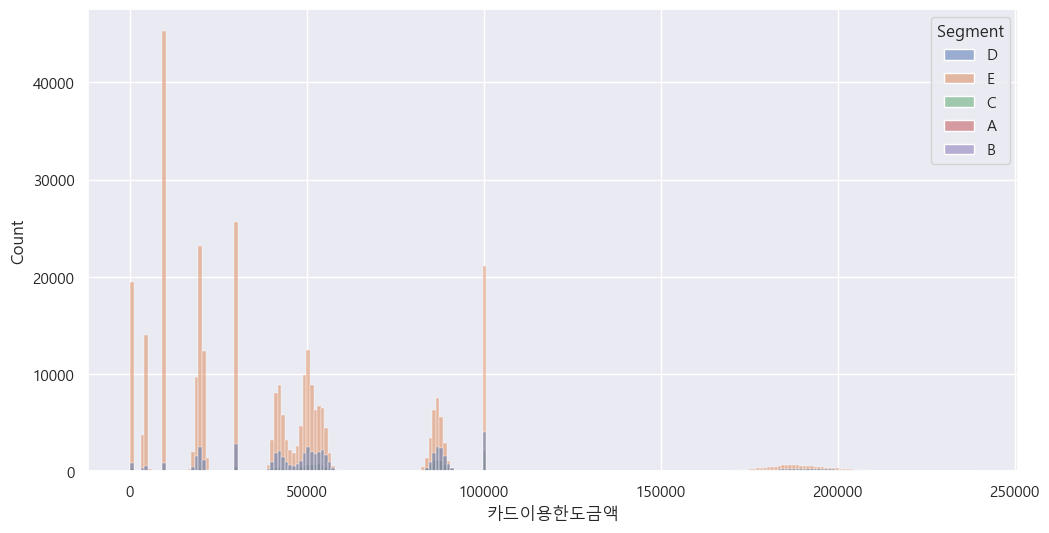

In [26]:
# 세그먼트별 데이터프레임 리스트와 레이블
dfs = [A_df.loc[A_df['카드이용한도금액'] != 0],
       B_df.loc[B_df['카드이용한도금액'] != 0],
       C_df.loc[C_df['카드이용한도금액'] != 0],
       D_df.loc[D_df['카드이용한도금액'] != 0],
       E_df.loc[E_df['카드이용한도금액'] != 0]]
segments = ['A', 'B', 'C', 'D', 'E']

# 서브플롯 생성 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # 2차원을 1차원으로 변환해서 인덱싱 편하게

# 각 세그먼트별 subplot에 그래프 그리기
for i, (df_seg, seg_label) in enumerate(zip(dfs, segments)):
    sns.histplot(
        data=df_seg,
        x='카드이용한도금액',
        kde=True,
        hue='Segment',
        ax=axes[i]
    )
    axes[i].set_title(f'Segment {seg_label}')
    axes[i].set_xlabel('카드이용한도금액')
    axes[i].set_ylabel('Count')

# 빈 subplot 제거 (2행 3열이지만 데이터는 5개)
if len(dfs) < len(axes):
    for j in range(len(dfs), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 카드이용한도금액_B2M

In [23]:
df['카드이용한도금액_B2M']

0          20690
1          10000
2          77033
3          20979
4         176300
           ...  
399995     21152
399996     78140
399997     63374
399998     10001
399999     71252
Name: 카드이용한도금액_B2M, Length: 400000, dtype: int64

In [37]:
df['rv최초시작후경과일']

0         99999999
1              325
2             2438
3         99999999
4         99999999
            ...   
399995    99999999
399996    99999999
399997    99999999
399998    99999999
399999    99999999
Name: rv최초시작후경과일, Length: 400000, dtype: int64

In [19]:
for idx, val in enumerate(df.columns) :
    print(f'{idx} : {val}')

0 : ID
1 : 카드이용한도금액
2 : 일시상환론한도금액
3 : 월상환론한도금액
4 : CA이자율_할인전
5 : RV일시불이자율_할인전
6 : 자발한도감액금액_R12M
7 : 강제한도감액횟수_R12M
8 : 강제한도감액금액_R12M
9 : 강제한도감액후경과월
10 : 한도증액횟수_R12M
11 : 한도증액금액_R12M
12 : 한도증액후경과월
13 : 카드이용한도금액_B1M
14 : 카드이용한도금액_B2M
15 : rv최초시작후경과일
16 : Segment


#### 한도증액금액_R12M

- 금액이 0, 1, 2, 3으로 나오기 때문에 데이터의 의미를 찾기 힘들다.

In [101]:
df['한도증액금액_R12M'].value_counts()

한도증액금액_R12M
0    355675
1     40931
2      3392
3         2
Name: count, dtype: int64

In [100]:
df['한도증액횟수_R12M'].value_counts()

한도증액횟수_R12M
0    351199
1     48801
Name: count, dtype: int64